# Thyroid Analysis

In [1]:
import cv2
import numpy as np
import nrrd
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import os

## 1. NRRD Files

In [14]:
# Set the directory you want to list files from
directory = 'USGdataNRRD'

# Use the glob module to create a list of file paths
images_paths = sorted(glob.glob(directory + '/data_output' + '**/*', recursive=True))
contoures_paths = sorted(glob.glob(directory + '/contures' + '**/*', recursive=True))

In [15]:
images_paths[-10:]

['USGdataNRRD/data_output/94_1.nrrd',
 'USGdataNRRD/data_output/95_1.nrrd',
 'USGdataNRRD/data_output/96_1.nrrd',
 'USGdataNRRD/data_output/96_2.nrrd',
 'USGdataNRRD/data_output/97_1.nrrd',
 'USGdataNRRD/data_output/97_2.nrrd',
 'USGdataNRRD/data_output/98_1.nrrd',
 'USGdataNRRD/data_output/99_1.nrrd',
 'USGdataNRRD/data_output/99_2.nrrd',
 'USGdataNRRD/data_output/9_1.nrrd']

In [16]:
contoures_paths[-10:]

['USGdataNRRD/contures/94_1_ROI.nrrd',
 'USGdataNRRD/contures/95_1_ROI.nrrd',
 'USGdataNRRD/contures/96_1_ROI.nrrd',
 'USGdataNRRD/contures/96_2_ROI.nrrd',
 'USGdataNRRD/contures/97_1_ROI.nrrd',
 'USGdataNRRD/contures/97_2_ROI.nrrd',
 'USGdataNRRD/contures/98_1_ROI.nrrd',
 'USGdataNRRD/contures/99_1_ROI.nrrd',
 'USGdataNRRD/contures/99_2_ROI.nrrd',
 'USGdataNRRD/contures/9_1_ROI.nrrd']

In [17]:
# Read the NRRD file
nrrd_data, header = nrrd.read(images_paths[220])

# Print the NRRD header
print(header)

# Access the data from the NRRD file
print(nrrd_data)

OrderedDict([('type', 'uint8'), ('dimension', 2), ('sizes', array([360, 560])), ('encoding', 'gzip')])
[[ 0  0  0 ...  5  0  2]
 [ 0  0  0 ...  3 16  0]
 [ 0  0  0 ...  0  5  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [18]:
nrrd_data.shape

(360, 560)

In [19]:
header

OrderedDict([('type', 'uint8'),
             ('dimension', 2),
             ('sizes', array([360, 560])),
             ('encoding', 'gzip')])

In [20]:
len(contoures_paths)

480

USGdataNRRD/data_output/100_1.nrrd
USGdataNRRD/contures/100_1_ROI.nrrd


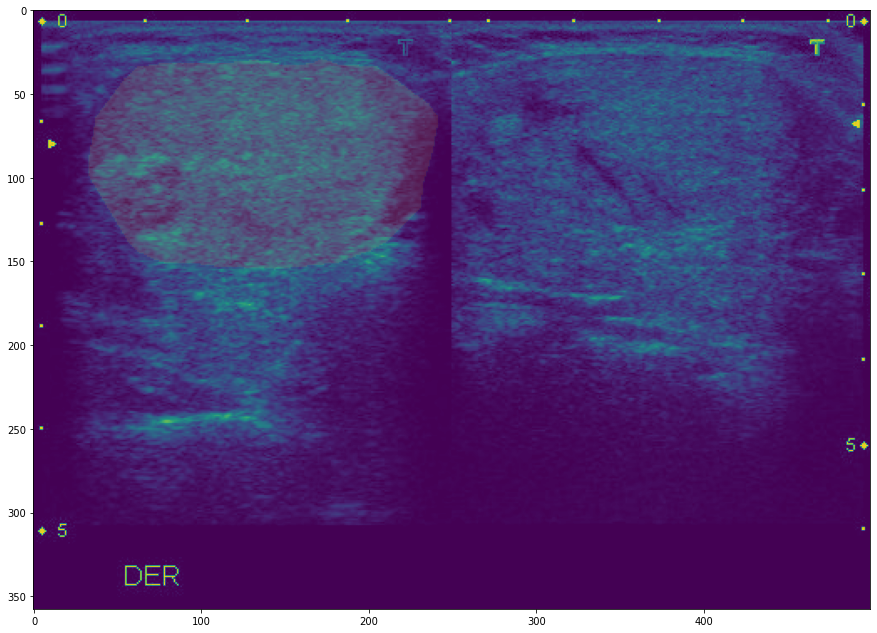

In [21]:
X_MARGIN = 1
Y_MARGIN = 30

i = 0

print(images_paths[i])
print(contoures_paths[i])

# Read images
image1, header = nrrd.read(images_paths[i])
image2, header = nrrd.read(contoures_paths[i])

image1 = image1[X_MARGIN:-X_MARGIN, Y_MARGIN:-Y_MARGIN]
image2 = image2[X_MARGIN:-X_MARGIN, Y_MARGIN:-Y_MARGIN]

fig = plt.figure(figsize=(15, 15))

# Create a single subplot
ax = plt.subplot()

ax.imshow(image1)
ax.imshow(image2, alpha=0.1)

# Show the figure
plt.show()

In [22]:
image1.shape

(358, 500)

In [23]:
random_values = np.random.rand(100)
random_array = np.resize(random_values, (5, 20))

In [24]:
w, h = random_array.shape

In [25]:
test_values = [i for i in range(10)]

In [26]:
test_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [27]:
test_values[1:-1]

[1, 2, 3, 4, 5, 6, 7, 8]

In [28]:
sorted(test_values, reverse=True)[1]

8

### Detect lines

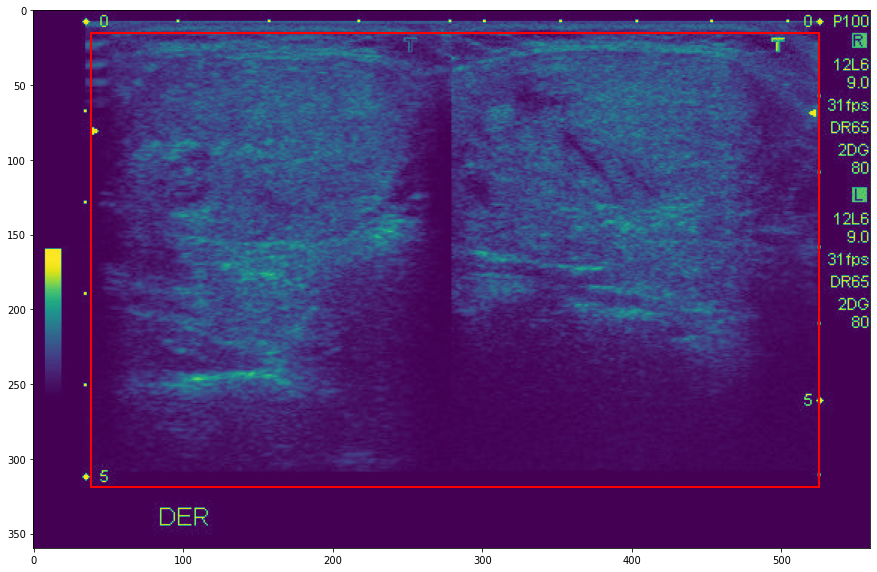

In [29]:
def detect_image_frame(image, margin_x=40, margin_y=10):
    
    X_MARGIN = 15
    Y_MARGIN = 30
    
    image = image[X_MARGIN:-50, Y_MARGIN:-Y_MARGIN]

    # Apply edge detection to the grayscale image
    edges = cv2.Canny(image, 50, 100)

    # Use the HoughLinesP function to detect lines in the image
    lines = cv2.HoughLinesP(edges, 2, np.pi/180, 50, minLineLength=5, maxLineGap=10)
    vertical_lines = []

    xs = []
    ys = []

    # Iterate over the detected lines
    for line in lines:
        x1, y1, x2, y2 = line[0]

        # Filter out lines that are not vertical
        if x1 != x2 and y1 != y2:
            continue

        xs.append(x1)
        xs.append(x2)

        ys.append(y1)
        ys.append(y2)

        # Filter out lines that are not long enough
        if abs(y1 - y2) < 200:
            continue

    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    
    # return min_x + margin_x, max_x - margin_x, min_y + margin_y, max_y - margin_y
    return min_x+Y_MARGIN, max_x+Y_MARGIN, min_y+X_MARGIN, max_y+Y_MARGIN

# Read the image
image, header = nrrd.read(images_paths[0])

fig = plt.figure(figsize=(15, 15))
ax = plt.subplot()
ax.imshow(image)

min_x, max_x, min_y, max_y = detect_image_frame(image)

ax.plot([min_x, min_x], [min_y, max_y], color='red', linewidth=2)
ax.plot([max_x, max_x], [min_y, max_y], color='red', linewidth=2)

ax.plot([min_x, max_x], [min_y, min_y], color='red', linewidth=2)
ax.plot([min_x, max_x], [max_y, max_y], color='red', linewidth=2)

plt.show()

In [30]:
header

OrderedDict([('type', 'uint8'),
             ('dimension', 2),
             ('sizes', array([360, 560])),
             ('encoding', 'gzip')])

In [31]:
image.shape

(360, 560)

In [32]:
cropped_image = image[min_y:max_y, min_x:max_x]

In [33]:
cropped_image.shape

(304, 487)

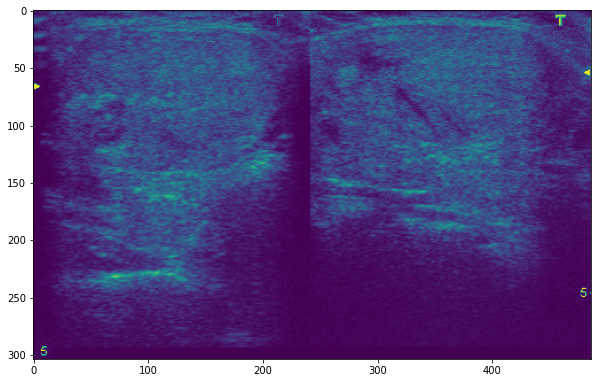

In [34]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()
ax.imshow(cropped_image)
plt.show()

### Process Images

In [35]:
len(images_paths)

480

In [36]:
def extract_raw_images(images_paths, contoures_paths, save=True, resize='padding'):
    points = []
    full_images = []
    images = []
    masks = []
    failed = []
    
    for i in range(len(images_paths)):

        image, header = nrrd.read(images_paths[i])
        contour, header = nrrd.read(contoures_paths[i])

        try:
            min_x, max_x, min_y, max_y = detect_image_frame(image)
        except:
            failed.append(i)
            continue

        num = (max_x-min_x)
        den = (max_y-min_y)

        if den == 0:
            failed.append(i)
            continue

        ratio = num / den 

        if ratio > 3 or ratio < 0.33:
            failed.append(i)
            continue

        try:
            cropped_image = image[min_y:max_y, min_x:max_x]
            cropped_contour = contour[min_y:max_y, min_x:max_x]

            cropped_image = cropped_image[..., np.newaxis]
            cut_image = tf.image.resize(cropped_image, (512, 512))
            padded_image = tf.image.resize_with_pad(cropped_image, 512, 512)

            cropped_contour = cropped_contour[..., np.newaxis]
            cut_contour = tf.image.resize(cropped_contour, (512, 512))
            padded_contour = tf.image.resize_with_pad(cropped_contour, 512, 512)

            images.append(cropped_image)
            masks.append(cropped_contour)
            full_images.append(image)
            points.append([min_x, max_x, min_y, max_y])
        except:
            continue
            
    
    images = np.array(images)
    masks = np.array(masks)
    full_images = np.array(full_images)
    points = np.array(points)
    
    return images, masks, full_images, points
        

In [37]:
images, masks, full_images, points = extract_raw_images(images_paths,contoures_paths)

/home/sciemala/thyroid_analysis/.env/lib64/python3.6/site-packages/ipykernel_launcher.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/sciemala/thyroid_analysis/.env/lib64/python3.6/site-packages/ipykernel_launcher.py:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [38]:
print(images.shape)
print(masks.shape)
print(full_images.shape)
print(points.shape)

(480,)
(480,)
(480, 360, 560)
(480, 4)


In [39]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from math import ceil

COLS, ROWS = 4, 9
N_SUB = COLS * ROWS
N_TABS = ceil(len(images) / N_SUB)

In [89]:
%matplotlib inline

# N_TABS = 2

outs = [widgets.Output() for i in range(N_TABS)]
tab = widgets.Tab(children = outs)
for i in range(len(outs)): tab.set_title(i, str(i))
display(tab)

nth_image = 0
for n_tab, out in enumerate(outs):
    with out:
        fig, axs = plt.subplots(ROWS, COLS, figsize=(25, 25))
        sub_images = full_images[n_tab*N_SUB:(n_tab+1)*N_SUB]
        sub_points = points[n_tab*N_SUB:(n_tab+1)*N_SUB]
        for i, ax in enumerate(axs.flat):
            ax.imshow(sub_images[i])
            min_x, max_x, min_y, max_y = sub_points[i]

            ax.plot([min_x, min_x], [min_y, max_y], color='red', linewidth=2)
            ax.plot([max_x, max_x], [min_y, max_y], color='red', linewidth=2)

            ax.plot([min_x, max_x], [min_y, min_y], color='red', linewidth=2)
            ax.plot([min_x, max_x], [max_y, max_y], color='red', linewidth=2)
            
            # ax.title(str(nth_image))
            
            if i == len(sub_images)-1 and n_tab == N_TABS-1: break
        plt.show()

In [90]:
%matplotlib inline

outs = [widgets.Output() for i in range(N_TABS)]
tab = widgets.Tab(children = outs)
for i in range(len(outs)): tab.set_title(i, str(i))
display(tab)

for n_tab, out in enumerate(outs):
    with out:
        fig, axs = plt.subplots(ROWS, COLS, figsize=(25, 25))
        sub_images = images[n_tab*N_SUB:(n_tab+1)*N_SUB]
        sub_masks = masks[n_tab*N_SUB:(n_tab+1)*N_SUB]
        for i, ax in enumerate(axs.flat):
            ax.imshow(sub_images[i])
            ax.imshow(sub_masks[i], alpha=0.5)
            
            if i == len(sub_images)-1 and n_tab == N_TABS-1: break
        plt.show()

## Save

In [2]:
# Set the directory path
raw_dir = "RawUSGimagesNRRD"
raw_images = raw_dir + "/data_output"
raw_masks = raw_dir + "/masks"

In [98]:
if not os.path.exists(raw_dir):
    os.makedirs(raw_dir)

if not os.path.exists(raw_images):
    os.makedirs(raw_images)

if not os.path.exists(raw_masks):
    os.makedirs(raw_masks)

In [2]:
raw_masks

'RawUSGimagesNRRD/masks'

In [101]:
for i in range(len(images)):    
    nrrd.write(f'{raw_images}/{i}.nrrd', images[i])
    nrrd.write(f'{raw_masks}/{i}.nrrd', masks[i])

## 2. Create Tensorflow Dataset

In [3]:
raw_images_paths = sorted(glob.glob(raw_images + '**/*', recursive=True))
raw_masks_paths = sorted(glob.glob(raw_masks + '**/*', recursive=True))

In [7]:
raw_images = []
raw_masks = []

In [8]:
for i in range(len(raw_images_paths)):
    raw_image, header = nrrd.read(raw_images_paths[i])
    raw_mask, header = nrrd.read(raw_masks_paths[i])
    
    raw_images.append(tf.image.resize_with_pad(raw_image, 512, 512))
    raw_masks.append(tf.image.resize_with_pad(raw_mask, 512, 512))

In [10]:
raw_images[0].shape

(304, 487, 1)

In [ ]:
raw_images = np.array(raw_images)
raw_masks = np.array(raw_masks)

In [122]:
full_paths = list(zip(raw_images_paths, raw_masks_paths))

In [43]:
images[0].shape

(304, 487, 1)

In [9]:
dataset = tf.data.Dataset.from_tensor_slices((raw_images, raw_masks))

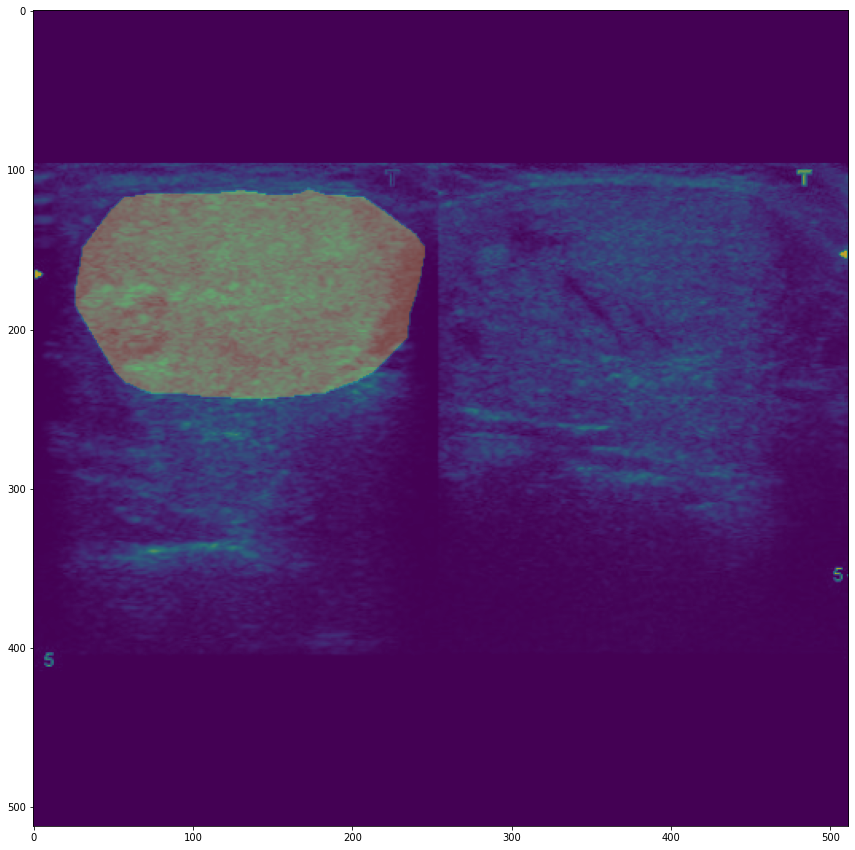

In [12]:
# Create a dataset with the first 10 elements
num_elements = 10
taken_dataset = dataset.take(num_elements)

# Iterate over the dataset and print the elements
for image, mask in taken_dataset.take(1):
    fig = plt.figure(figsize=(15, 15))

    # Create a single subplot
    ax = plt.subplot()

    ax.imshow(image)
    ax.imshow(mask, alpha=0.3)

# Show the figure
plt.show()

### Show Images in Grid

In [ ]:
plt.figure(figsize=(20,15))
i = 1
for image, mask in dataset.take(9):
    # print(image.shape)
    plt.subplot(3, 3, i)
    i += 1
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)
plt.show()

In [ ]:
input_image = dataset.take(1)

In [ ]:
input_image

In [ ]:
for input_image, mask_image in dataset.take(1):
    print(input_image)